In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp 
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [41]:
duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples) / fs


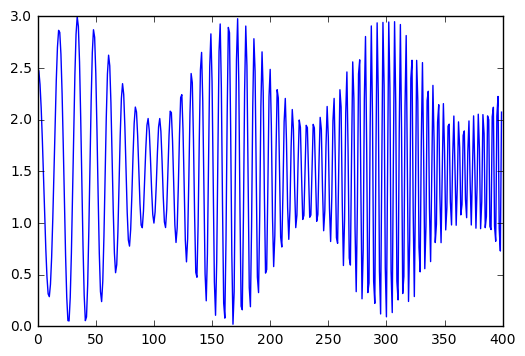

In [42]:
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t))
signal=signal+1.5
plot (signal)


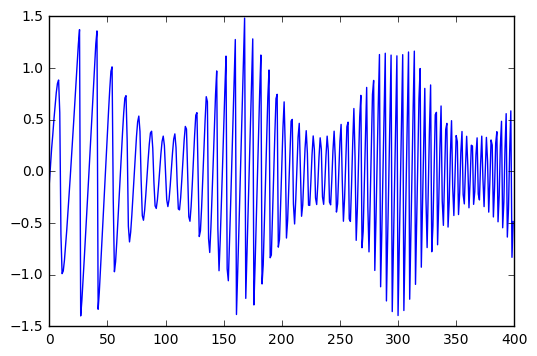

In [43]:
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi)* fs)
plot (instantaneous_phase)

(0.0, 120.0)

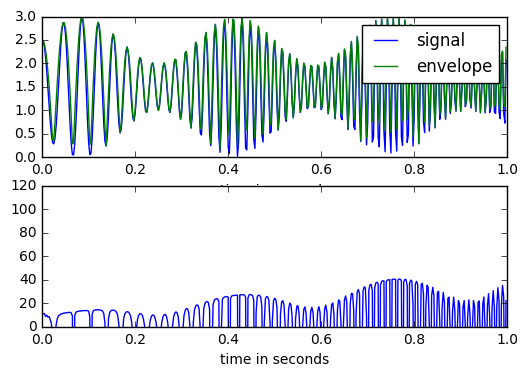

In [44]:
fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)